In [3]:
#Necessary libraries for building and analyzing an Artificial Neural Network (ANN)
import numpy as np #numerical computing
import tensorflow as tf #open-source deep learning framework
from tensorflow import keras #Keras is a high-level API for building and training deep learning models
import torch #deep learning framework that is highly flexible and often used in research due to its dynamic computation graph
import matplotlib.pyplot as plt #visualizing data

In [4]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
RESHAPED = 28 * 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data from (60000, 28, 28) to (60000, 784) and (10000, 784)
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

# Convert the data type to float32 for model compatibility
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# One-hot representation of the labels
NB_CLASSES = 10
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)
print(y_train[0])

Train shape: (60000, 784)
Test shape: (10000, 784)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
N_HIDDEN = 128

# Build and compile the model
model = tf.keras.models.Sequential()
# Build the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
          input_shape = (RESHAPED,),
          name = 'dense_layer',
          activation = 'relu'))
model.add(keras.layers.Dense(N_HIDDEN,
          input_shape = (N_HIDDEN,),
          name = 'dense_layer_2',
          activation = 'relu'))

model.add(keras.layers.Dense(NB_CLASSES,
          input_shape = (N_HIDDEN,),
          name = 'dense_layer_3',
          activation = 'softmax'))

model.compile(optimizer='SGD',
 loss='categorical_crossentropy',
 metrics=['accuracy'])


c:\Users\s4im0\Documents\LUISS\Machine Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Train the model
# Network and training parameters.
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
VALIDATION_SPLIT = 0.2

history = model.fit(X_train, y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6484 - loss: 1.4127 - val_accuracy: 0.8397 - val_loss: 0.7111
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8530 - loss: 0.5805 - val_accuracy: 0.8855 - val_loss: 0.4460
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8824 - loss: 0.4321 - val_accuracy: 0.9002 - val_loss: 0.3689
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8954 - loss: 0.3741 - val_accuracy: 0.9060 - val_loss: 0.3330
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9033 - loss: 0.3412 - val_accuracy: 0.9135 - val_loss: 0.3072
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9099 - loss: 0.3179 - val_accuracy: 0.9177 - val_loss: 0.2904
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9145 - loss: 0.2997 - val_accuracy: 0.9209 - val_loss: 0.2761
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9185 - loss: 0.2846 - val_accuracy: 0.

$375 = (60,000$  (the features in our dataset) $* 0.8$ (the part dedicated to the training))$ /  128 (batch size)$

# Open the black box

We create an activation model. Instead of just predicting the final output (the digit class), we create a model that will show us the activations at each layer of the network (the results of the computations for each neuron in each layer).

We use the first 3 layers of the already trained model (model.layers[0], model.layers[1], model.layers[2]) to capture the activations of these layers for a specific input.

In [9]:
#Setting up the Input and Output Layers for Visualization
input_layer = keras.layers.Input(shape=(RESHAPED,), name='input_layer')
output1 = model.layers[0](input_layer)
output2 = model.layers[1](output1)
output3 = model.layers[2](output2)
layer_outputs = [output1, output2, output3]
activation_model = keras.models.Model(inputs=input_layer, outputs=layer_outputs)

Visualization of neuron activations in a neural network across different layers

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


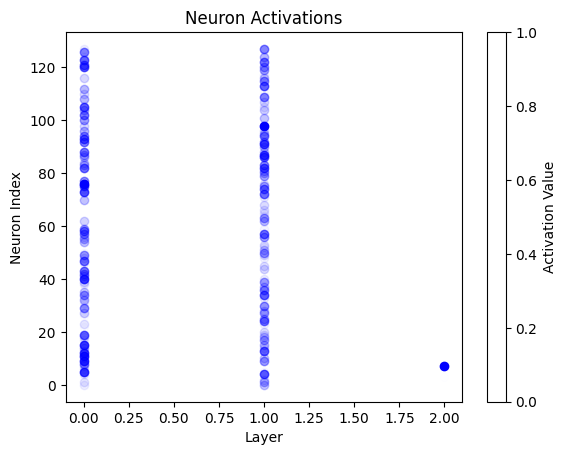

In [10]:
sample = np.expand_dims(X_test[0], axis = 0)

# Predict activations
activations = activation_model.predict(sample)

# Plot the activations
for layer_number, layer_activations in enumerate(activations):
    num_neurons = layer_activations.shape[-1]  # Number of neurons in the layer
    max_activation = max(layer_activations[0]) or 1  # Avoid division by zero
    for neuron_index in range(num_neurons):
        alpha_value = layer_activations[0, neuron_index] / max_activation
        plt.scatter(layer_number, neuron_index, c='blue', alpha=alpha_value)

plt.xlabel('Layer')
plt.ylabel('Neuron Index')
plt.title('Neuron Activations')
plt.colorbar(label='Activation Value')
plt.show()


#Blue Dots (Neuron Activations): Each dot represents a neuron,
# and its color intensity or transparency corresponds to its activation level.

Layers 0 and 1 have many active neurons, while layer 2 has only one strongly activated neuron.

This plot helps analyze how the neural network processes input data and which neurons are most active in each layer.

## Comment
These neurons activate if and only if they receive as input pixels in a given POSITION with a non-zero brightness.
In your opinion, what happens if I take one of these images and apply a translation on the x and y axis?

C:\Users\s4im0\AppData\Local\Temp\ipykernel_15060\1083389582.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


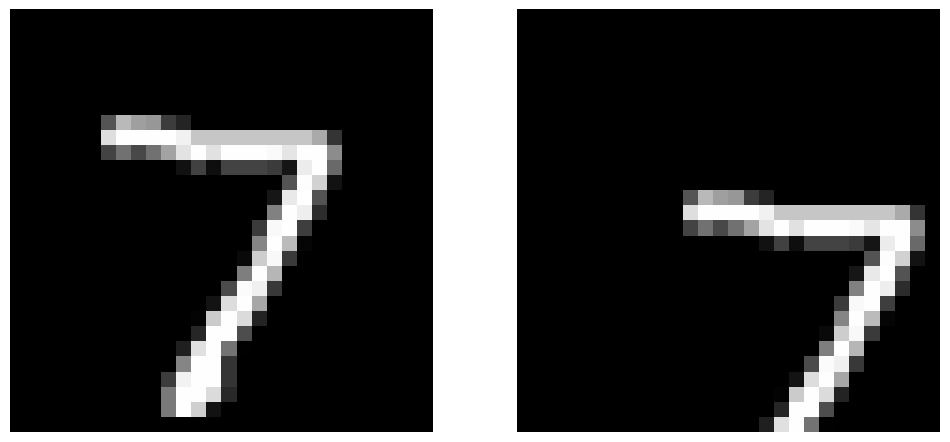

In [13]:
image = X_test[0].reshape(28, 28)

# Translate the image
shift_y = - 5  # How much to shift vertically
shift_x = - 5  # How much to shift horizontally

## Create an empty matrix with the same shape as the original image
translated_image = np.zeros_like(image)

# Compute the new position for each pixel
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_y = y - shift_y
        new_x = x - shift_x
        # Make sure the new coordinates are within the image bounds
        if new_y >= 0 and new_y < image.shape[0] and new_x >= 0 and new_x < image.shape[1]:
            translated_image[new_y, new_x] = image[y, x]

# Now, translated_image has the brightest pixel at the top-left corner
# You might want to visualize it to confirm
fig, axs = plt.subplots(1,2, figsize = (12, 8))
axs[0].imshow(image, cmap = 'gist_gray')
axs[0].axis('off')
axs[1].imshow(translated_image, cmap = 'gist_gray')
axs[1].axis('off')
fig.show()

When shifting the image, some pixels move outside the frame and are lost, while new empty (black) pixels appear in the opposite direction. This can significantly impact the features extracted by the network.

In [14]:
sample = np.expand_dims(image.reshape(28 * 28), axis = 0)
prediction = np.argmax(model.predict(sample))

print(f'Prediction before translation: {prediction}')

sample = np.expand_dims(translated_image.reshape(28 * 28), axis = 0)
prediction = np.argmax(model.predict(sample))

print(f'Prediction after translation: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction before translation: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction after translation: 2


The model is likely not robust to translations and relies on positional information rather than recognizing features independently of location.





## Rotation Sensitivity

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


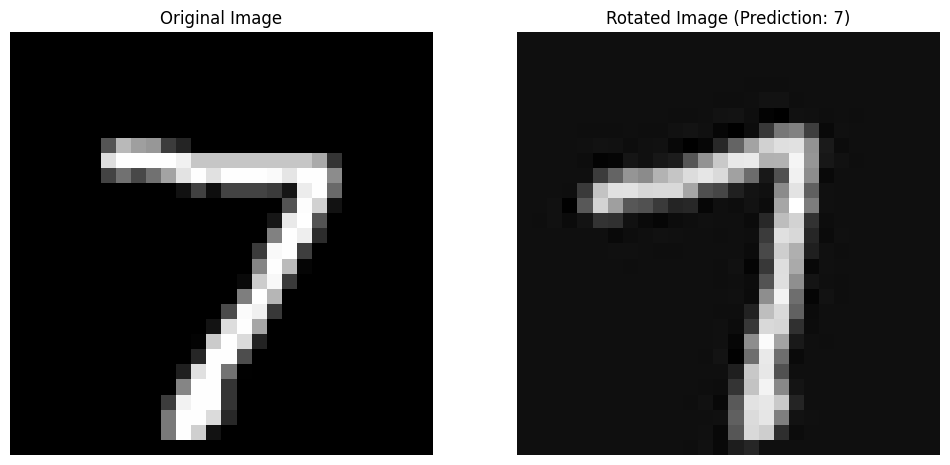

Prediction after rotation: 7


In [15]:
from scipy.ndimage import rotate

# Rotate the image by 20 degrees
rotated_image = rotate(image, angle=20, reshape=False)

# Predict on rotated image
sample = np.expand_dims(rotated_image.reshape(28 * 28), axis=0)
rotated_prediction = np.argmax(model.predict(sample))

# Show original vs rotated
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].imshow(image, cmap='gist_gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(rotated_image, cmap='gist_gray')
axs[1].set_title(f"Rotated Image (Prediction: {rotated_prediction})")
axs[1].axis('off')

plt.show()
print(f'Prediction after rotation: {rotated_prediction}')


## Noise Sensitivity

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


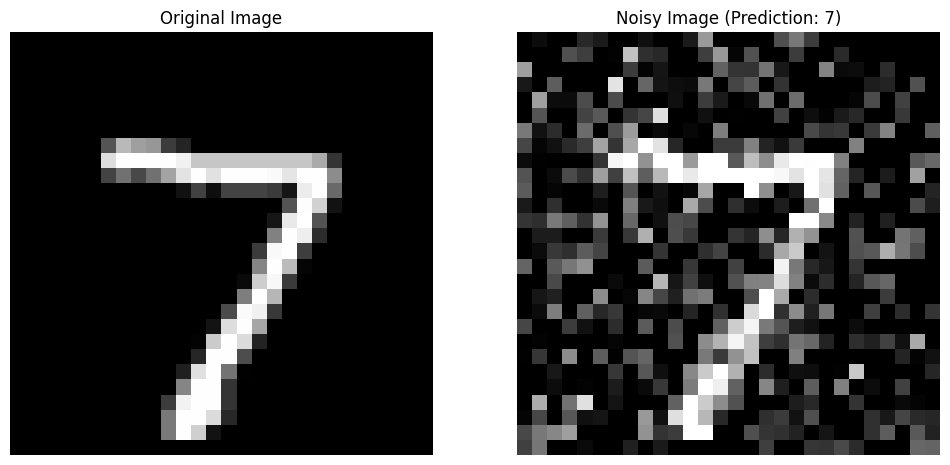

Prediction after adding noise: 7


In [18]:
noise_factor = 0.3
noisy_image = image + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=image.shape)
noisy_image = np.clip(noisy_image, 0, 1)  # Ensure pixel values are valid

# Predict on noisy image
sample = np.expand_dims(noisy_image.reshape(28 * 28), axis=0)
noisy_prediction = np.argmax(model.predict(sample))

# Show original vs noisy
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].imshow(image, cmap='gist_gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(noisy_image, cmap='gist_gray')
axs[1].set_title(f"Noisy Image (Prediction: {noisy_prediction})")
axs[1].axis('off')

plt.show()
print(f'Prediction after adding noise: {noisy_prediction}')


## Invert pixel values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


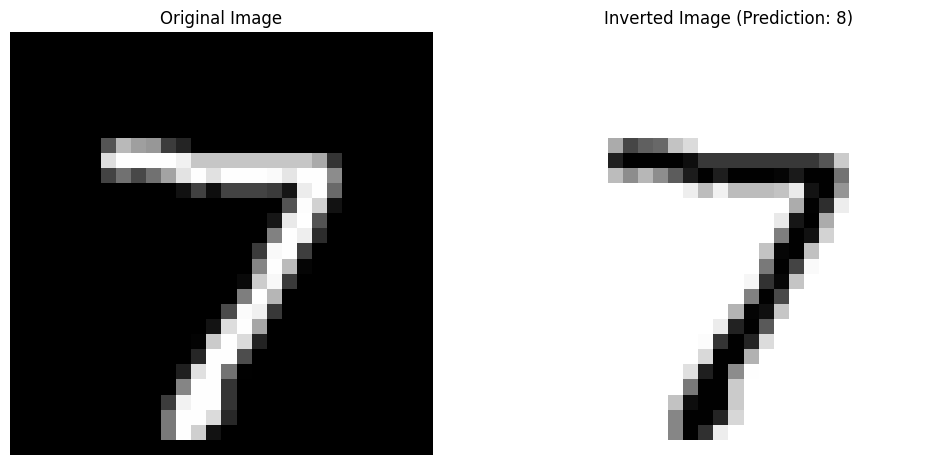

Prediction after color inversion: 8


In [19]:
inverted_image = 1 - image  # Invert pixel values

# Predict on inverted image
sample = np.expand_dims(inverted_image.reshape(28 * 28), axis=0)
inverted_prediction = np.argmax(model.predict(sample))

# Show original vs inverted
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].imshow(image, cmap='gist_gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(inverted_image, cmap='gist_gray')
axs[1].set_title(f"Inverted Image (Prediction: {inverted_prediction})")
axs[1].axis('off')

plt.show()
print(f'Prediction after color inversion: {inverted_prediction}')


## Occlusion

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


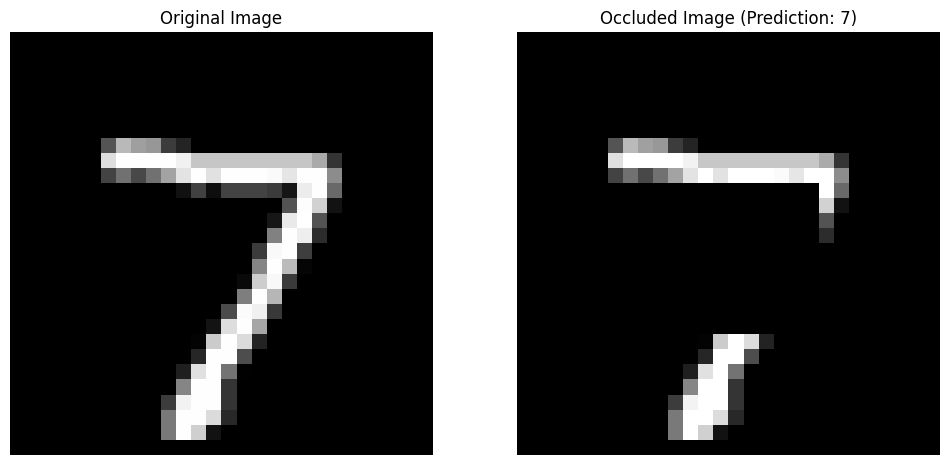

Prediction after occlusion: 7


In [22]:
occluded_image = image.copy()
occluded_image[10:20, 10:20] = 0  # Add black square 10x10

# Predict on occluded image
sample = np.expand_dims(occluded_image.reshape(28 * 28), axis=0)
occluded_prediction = np.argmax(model.predict(sample))

# Show original vs occluded
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].imshow(image, cmap='gist_gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(occluded_image, cmap='gist_gray')
axs[1].set_title(f"Occluded Image (Prediction: {occluded_prediction})")
axs[1].axis('off')

plt.show()
print(f'Prediction after occlusion: {occluded_prediction}')


## Adversarial Attack (Minimal Pixel Change Impact)

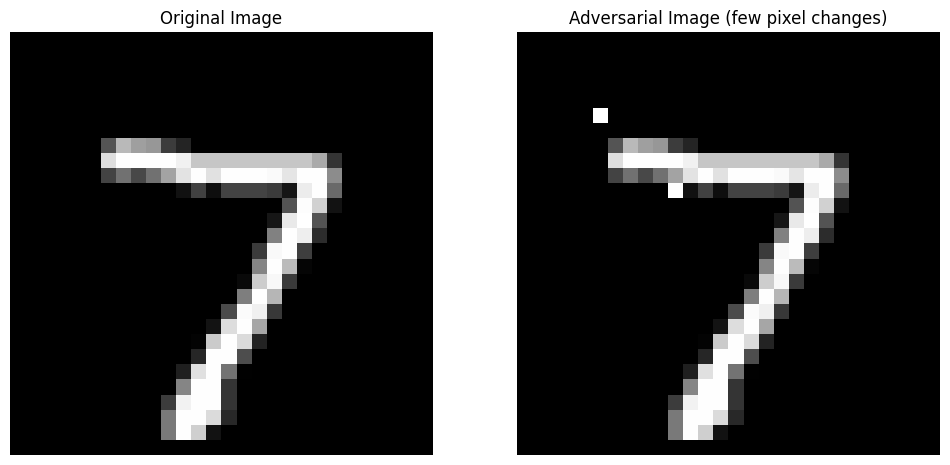

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction after adversarial modification: 7


In [23]:
# Slightly modify a few pixels
adversarial_image = image.copy()
adversarial_image[5, 5] = 1 - adversarial_image[5, 5]  # Invert one pixel
adversarial_image[10, 10] = 1 - adversarial_image[10, 10]

# Visualize the adversarial image
fig, axs = plt.subplots(1,2, figsize=(12, 8))
axs[0].imshow(image, cmap='gist_gray')
axs[0].set_title("Original Image")
axs[0].axis('off')
axs[1].imshow(adversarial_image, cmap='gist_gray')
axs[1].set_title("Adversarial Image (few pixel changes)")
axs[1].axis('off')
plt.show()

# Make predictions
sample = np.expand_dims(adversarial_image.reshape(28 * 28), axis=0)
prediction = np.argmax(model.predict(sample))
print(f'Prediction after adversarial modification: {prediction}')


![](https://drive.google.com/uc?export=view&id=17qhhc1ghm7iG2Z3Vx2ZfdaSRxUNFSpVo)

# Solution: CNN!

The idea is that images are like **signals** that produce an output value as function of the signal itself and the kernel.

<img src=https://miro.medium.com/v2/resize:fit:640/format:webp/0*TW1CoVdj92yxZF1s.gif>

In [24]:
# Load CIFAR-10 data
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# Normalize pixel values to be between 0 and 1

train_images, test_images = train_images / 255, test_images / 255


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step


c:\Users\s4im0\Documents\LUISS\Machine Learning\.venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")
